#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>
##### <font color="#03997A"> Mto: Getsemani Ruben Castro Villanueva </font>
##### <font color="#03997A"> Modulo 5 Manipulación de datos en Python</font>
##### <font color="#03997A">Practica 7 Alumno: Ibarra Ramírez Sergio  </font>

In [2]:
import pandas as pd 

titanic_csv = pd.read_csv("titanic.csv")
titanic_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Uso de libreria matplot lib

In [3]:
categorias = ['A', 'B', 'C', 'D']
valores = [10,20,40,35]


In [4]:
## Importando la libreria 
import matplotlib.pyplot as plt 

In [5]:
colores=["#03997A", "#335BFF", "red", "#55CC00"]

#### Gráfica de barras

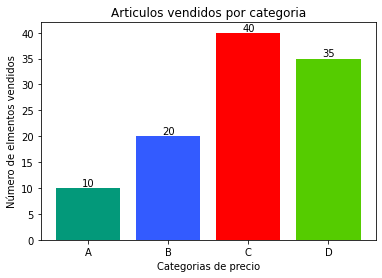

In [6]:
## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(categorias,valores, color=colores)
plt.xlabel('Categorias de precio')
plt.ylabel('Número de elmentos vendidos')
plt.title('Articulos vendidos por categoria')

# Add the values as labels on top of each bar
for i, v in enumerate(valores):
    plt.text(i, v, str(v), ha='center', va='bottom')


plt.show()


Pasemos a un ejemplo de uso del set de titanic.csv 

<BarContainer object of 891 artists>

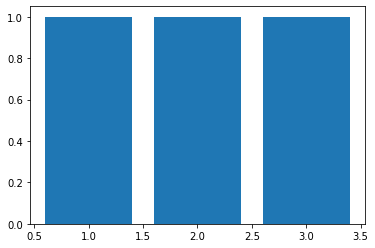

In [7]:
plt.bar(titanic_csv['Pclass'], titanic_csv['Survived'])

In [8]:
##Cuantos viajaron por cada clase 
## Entonces obviamente se agrupo por clase 
## Y una vez agrupados, qu quiero saber? 
## En este caso que me cuente el PassengeId por clase
pasajeros_por_clase = titanic_csv.groupby('Pclass').agg(total_por_clase=('PassengerId','count')).reset_index()
pasajeros_por_clase

,Pclass,total_por_clase
0,1,216
1,2,184
2,3,491


In [9]:
pasajeros_por_clase['Pclass'] = pasajeros_por_clase['Pclass'].astype(str)

Text(0.5, 1.0, 'Distribución de pasajeros por clase')

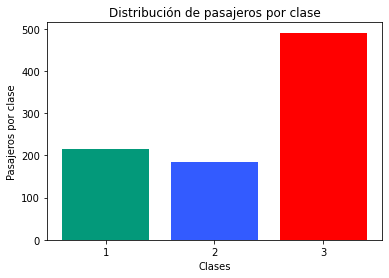

In [10]:
## Ahora hacemos el gráfico de barras de pasajeros por clase

## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(pasajeros_por_clase['Pclass'],pasajeros_por_clase['total_por_clase'], color=colores)
plt.xlabel('Clases')
plt.ylabel('Pasajeros por clase')
plt.title('Distribución de pasajeros por clase')


In [11]:
## Porcentaje de pasareros por clase 

pasajeros_por_clase.head()

,Pclass,total_por_clase
0,1,216
1,2,184
2,3,491


In [12]:
total_pasajeros = pasajeros_por_clase['total_por_clase'].sum()

## Agregamos una olumna a nuestro df 
pasajeros_por_clase['porcentaje_por_clase'] = pasajeros_por_clase['total_por_clase'] / total_pasajeros

pasajeros_por_clase.head()

,Pclass,total_por_clase,porcentaje_por_clase
0,1,216,0.242424
1,2,184,0.206510
2,3,491,0.551066


Text(0.5, 1.0, 'Distribución porcentual de pasajeros  por clase')

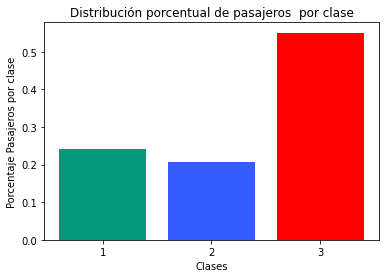

In [13]:
## Ahora hacemos el gráfico de barras de pasajeros por clase

## Gráfica de barras. Se le indica al objeto plt.bar

plt.bar(pasajeros_por_clase['Pclass'],pasajeros_por_clase['porcentaje_por_clase'], color=colores)
plt.xlabel('Clases')
plt.ylabel('Porcentaje Pasajeros por clase')
plt.title('Distribución porcentual de pasajeros  por clase')


### Uso de plotly 

In [14]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import plotly.graph_objects as go

# Crear el gráfico de barras
fig = go.Figure(data=go.Bar(x=pasajeros_por_clase['Pclass'], y=pasajeros_por_clase['porcentaje_por_clase']))

# Personalizar el gráfico
fig.update_layout(
    title='Distribución de pasajeros por clase en titanic',
    xaxis_title='Clase de boleto',
    yaxis_title='Porcentaje de pasajeros por clase de boleto'
)

# Mostrar el gráfico
fig.show()

#### Histogramas 

Ejemplo del histograma con matplotlib.pyplot

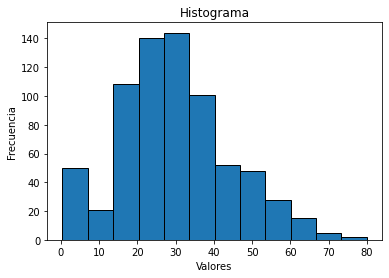

In [21]:
# Crear el histograma
plt.hist(titanic_csv['Age'], bins=12, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Mostrar el gráfico
plt.show()


In [20]:
titanic_csv['Age'].mean()
titanic_csv['Age'].std()

14.526497332334042

Ejemplo del histograma con plotly

In [23]:
#Plotly grafico de barras:

# Crear el gráfico de histograma
fig = go.Figure(data=go.Histogram(x=titanic_csv['Age'], nbinsx=10, marker=dict(color='green')))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de histograma de edad en titanic.csv',
    xaxis_title='Edad',
    yaxis_title='Frecuencia de edad'
)

# Mostrar el gráfico
fig.show()

#### Gráfico de lineas 

In [24]:
import plotly.express as px 

In [26]:
## Importamos los datos a usar 

datos_continente=px.data.gapminder()
datos_continente.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [28]:
datos_continente.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


Eemplo de como traer datos de 200 a 2007

In [35]:
datos_filtrados_por_anio = datos_continente[(datos_continente['year']>2000)& (datos_continente['year']<=2007)] 
datos_filtrados_por_anio

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
...,...,...,...,...,...,...,...,...
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1690,Zambia,Africa,2002,39.193,10595811,1071.613938,ZMB,894
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [36]:
datos_filtrados_por_anio.groupby('year').agg(total_poblacion=('pop', 'sum'))

,total_poblacion
year,
2002,5886977579
2007,6251013179


In [37]:
#Plotly grafico de barras:

# Crear el gráfico de histograma
fig = go.Figure(data=go.Histogram(x=datos_continente['year'], marker=dict(color='silver')))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de histograma de datos por año',
    xaxis_title='Año',
    yaxis_title='Frecuencia de datos por año'
)

# Mostrar el gráfico
fig.show()

In [40]:
##Vamos a filtrar de nuevo el año pero ahora de 

datos_filtrados_por_anio2 = datos_continente[(datos_continente['year']>=1987)].reset_index() 
datos_filtrados_por_anio2.head()


,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
1,8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
2,9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4
3,10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
4,11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4


In [49]:
datos_filtrados_por_anio2_frame = datos_filtrados_por_anio2.groupby('year').agg(total_poblacion=('pop', 'sum')).reset_index()
datos_filtrados_por_anio2_frame

,year,total_poblacion
0,1987,4691477418
1,1992,5110710260
2,1997,5515204472
3,2002,5886977579
4,2007,6251013179


Text(0.5, 1.0, 'Evolucion de la poblacion por año')

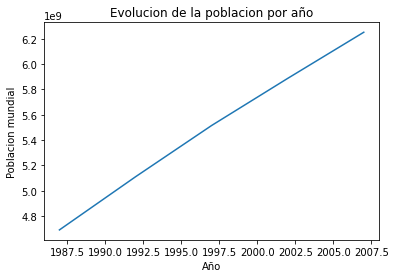

In [50]:
plt.plot(datos_filtrados_por_anio2_frame['year'],datos_filtrados_por_anio2_frame['total_poblacion'])
plt.xlabel('Año')
plt.ylabel('Poblacion mundial')
plt.title('Evolucion de la poblacion por año')


Ejemplo de grafico de linea con Plotly

In [52]:

import plotly.graph_objects as go

# Crear el gráfico de líneas
fig = go.Figure(data=go.Scatter(x=datos_filtrados_por_anio2_frame['year'], y=datos_filtrados_por_anio2_frame['total_poblacion'], mode='lines'))

# Personalizar el gráfico
fig.update_layout(
    title='Gráfico de líneaspoblacion mundial de 1987 a 2005',
    xaxis_title='Año',
    yaxis_title='Poblacion'
)

# Mostrar el gráfico
fig.show()